## Übung 1.2

### 1.2.1

Sprachverlustrate - Paketverlustrate

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

Es soll die Sprachsample-Verlustrate $p_{voice}$ in Abhängigkeit der Paketverlustrate $p_{loss}$ für die Replikationsgrade $R = 1, 2, 3, 4$ dargestellt werden. Im Skript ist das auf Folie 16 - 18 dargestellt. Hier kann auch die Formel verwendet werden: $p_{voice} = p_{loss}^R$. Für die Paketverlustrate $p_{loss}$ werden Werte von 0% bis 100% verwendet.

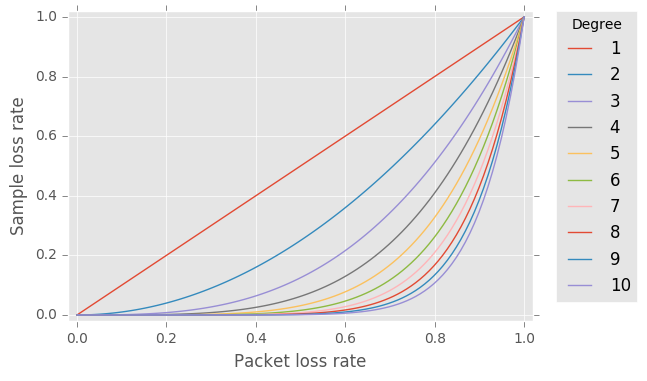

In [2]:
# plr = packet loss rate
p_loss = np.linspace(0., 1., 100)
degrees = [d for d in range(1, 11)]
for degree in degrees:
    p_voice = p_loss ** degree
    plt.plot(p_loss, p_voice, label=str(degree))

# legende hinzufuegen
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Degree')

# padding hinzufuegen
x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .02, x_max + .02, y_min - .02, y_max + .02))

plt.ylabel('Sample loss rate')
plt.xlabel('Packet loss rate')

plt.show()


### 1.2.2

MOS - Paketverlustrate

Mit der zuvor berechneten Sprachverlustrate lässt sich der $MOS(p_{voice})$ bestimmen ( $MOS(x) = 4 e^{-4.2 * x} + 1$ - siehe Aufgabenstellung). Bereits bei einer Replikationsrate von 2 lässt sich eine erhebliche Verbesserung feststellen.

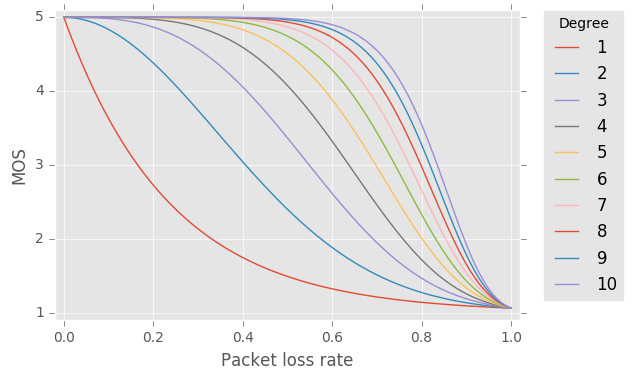

In [8]:
import math

for degree in degrees:
    p_voice = p_loss ** degree
    mos = [4 * math.exp(-4.2 * x) + 1 for x in p_voice]
    plt.plot(p_loss, mos, label=str(degree))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Degree')

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - .02, x_max + .02, y_min - .1, y_max + .1))

plt.ylabel('MOS')
plt.xlabel('Packet loss rate')

plt.show()

### 1.2.3

Es soll zunächst die Verzögerung der empfangenen Sprachsamples bestimmt werden. Alle 20ms wird ein Paket mit einer konstanten Verzögerung von 13ms versendet. Hierzu ist vor allem die Folie 16 zur Veranschaulichung hilfreich. 

In [12]:
import random

packet_count = 100000
degree = 4
loss = 0.09
packet_time_delta = 20
delay_sender_receiver = 13

# Jedes Paket kommt an
packets = []
sample_delay = [0 for x in range(packet_count)]

for i in range(packet_count):
    packets.append(random.uniform(0, 1) > loss)
    
packets[-20:]

[True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True]